In [ ]:
__depends__ = 'count_by_date.p'
__dest__ = 'joined_data.p'

In [77]:
import pandas as pd

In [38]:
# pd.set_option('display.min_rows', 500)
pd.reset_option('display.min_rows')

In [78]:
df = pd.read_pickle('count_by_date.p')

In [80]:
df.drop('date', axis=1,inplace=True)

In [81]:
df

,count
dt,
2016-01-02,348
2016-01-04,367
2016-01-05,363
2016-01-06,432
2016-01-07,463
...,...
2018-12-26,6570
2018-12-27,5904
2018-12-28,3004


In [92]:
f = pd.read_csv('temp_clean.csv')

In [96]:
f

,time,temperature_2m (°C),precipitation (mm),rain (mm)
0,2016-01-01 00:00:00,7.6,0.0,0.0
1,2016-01-01 01:00:00,7.5,0.0,0.0
2,2016-01-01 02:00:00,7.1,0.0,0.0
3,2016-01-01 03:00:00,6.6,0.0,0.0
4,2016-01-01 04:00:00,6.3,0.0,0.0
...,...,...,...,...
59582,2022-10-19 19:00:00,12.2,0.0,0.0
59583,2022-10-19 20:00:00,12.2,0.0,0.0
59584,2022-10-19 21:00:00,12.2,0.0,0.0
59585,2022-10-19 22:00:00,11.1,0.0,0.0


In [97]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59587 entries, 0 to 59586
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 59587 non-null  object 
 1   temperature_2m (°C)  59587 non-null  float64
 2   precipitation (mm)   59587 non-null  float64
 3   rain (mm)            59587 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.8+ MB


In [98]:
f['time'] = pd.to_datetime(f['time'])

In [100]:
f = f.set_index('time')

In [101]:
f.columns = ['temp', 'precip', 'rain']

In [102]:
f

,temp,precip,rain
time,,,
2016-01-01 00:00:00,7.6,0.0,0.0
2016-01-01 01:00:00,7.5,0.0,0.0
2016-01-01 02:00:00,7.1,0.0,0.0
2016-01-01 03:00:00,6.6,0.0,0.0
2016-01-01 04:00:00,6.3,0.0,0.0
...,...,...,...
2022-10-19 19:00:00,12.2,0.0,0.0
2022-10-19 20:00:00,12.2,0.0,0.0
2022-10-19 21:00:00,12.2,0.0,0.0


In [103]:
f = f.resample('d').agg({'temp':'mean','precip':'sum','rain':'sum'})

In [104]:
frame = df.join(f)

In [105]:
frame

,count,temp,precip,rain
dt,,,,
2016-01-02,348,2.387500,0.0,0.0
2016-01-04,367,0.100000,0.0,0.0
2016-01-05,363,-6.775000,0.0,0.0
2016-01-06,432,-2.275000,0.0,0.0
2016-01-07,463,0.516667,0.0,0.0
...,...,...,...,...
2018-12-26,6570,1.883333,0.0,0.0
2018-12-27,5904,2.979167,0.0,0.0
2018-12-28,3004,7.741667,22.1,22.1


Let's remove the holidays and sundays from the data

In [107]:
frame = frame.loc[frame['count']>50]

In [108]:
frame

,count,temp,precip,rain
dt,,,,
2016-01-02,348,2.387500,0.0,0.0
2016-01-04,367,0.100000,0.0,0.0
2016-01-05,363,-6.775000,0.0,0.0
2016-01-06,432,-2.275000,0.0,0.0
2016-01-07,463,0.516667,0.0,0.0
...,...,...,...,...
2018-12-26,6570,1.883333,0.0,0.0
2018-12-27,5904,2.979167,0.0,0.0
2018-12-28,3004,7.741667,22.1,22.1


<AxesSubplot:xlabel='dt'>

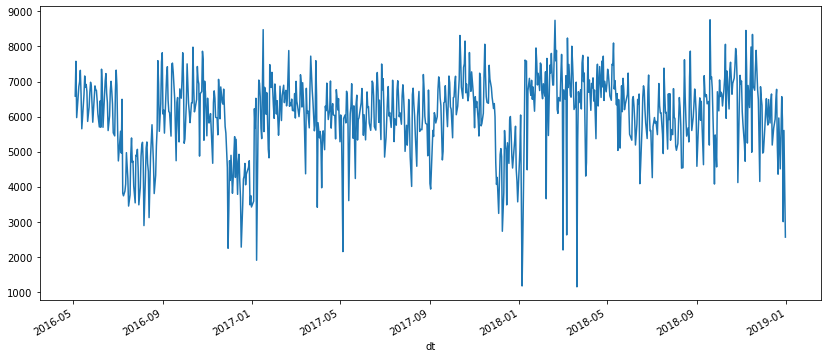

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
frame['count'].plot()

In [113]:
frame['count']

dt
2016-01-02     348
2016-01-04     367
2016-01-05     363
2016-01-06     432
2016-01-07     463
              ... 
2018-12-26    6570
2018-12-27    5904
2018-12-28    3004
2018-12-29    5605
2018-12-31    2563
Name: count, Length: 916, dtype: int64

The amount of tickets given per day rose steeply in early 2016 and stabalized in may 2016. We will remove any data prior to may 2016.

In [114]:
frame = frame.loc['2016-05-04':]

In [115]:
frame.to_pickle('joined_data.p')